### Locating CUSP in Census Track File - a demonstration of Geopandas

In [25]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import shapely as shp
import os

from fiona.crs import from_epsg

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Data Wrangling 

In [3]:
PUIdata = os.getenv('PUIDATA')  
print(PUIdata)

/home/cusp/mal824/PUIdata


In [4]:
#downloading the census file
os.system("curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip")
os.system("mv nycb2010_16d.zip " + os.getenv("PUIDATA"))

0

In [5]:
#unzipping the census file and moving the unzipped file to PUIdata
os.system('unzip ' + os.getenv("PUIDATA") + '/' + 'nycb2010_16d.zip')
os.system("mv nycb2010_16d " + os.getenv("PUIDATA"))

0

In [8]:
#reading the shapefile with the data 
shapefile= (os.getenv("PUIDATA") + '/' + 'nycb2010_16d' + '/' + 'nycb2010.shp')
ct_shape = GeoDataFrame.from_file(shapefile)
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [10]:
# Changing the coordinate system to epsg=4326
ct_shape = ct_shape.to_crs(epsg=4326)

In [11]:
print (ct_shape.BoroName.unique())

['Staten Island' 'Manhattan' 'Brooklyn' 'Bronx' 'Queens']


In [12]:
#reducing shapefile to keep only the Borough of Brooklyn
ct_shape_brooklyn = ct_shape[ct_shape.BoroName == 'Brooklyn']

In [13]:
ct_shape_brooklyn = ct_shape_brooklyn.reset_index(drop = True)
ct_shape_brooklyn.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365178...
1,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567196...
2,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981345...
3,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.98514306089652 40.6948851429698,..."
4,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


#### Finding Coordinates of 1 Metro Tech Brooklyn (CUSP location)

In [14]:
# CUSP's coordinates are (-73.9885917, 40.6932169) as per Google Maps 
cusp = shp.geometry.Point((-73.9885917, 40.6932169))

In [17]:
# Creating a loop through the census track data (polygon shapes) to determine within which polygon the 
# CUSP location coordinate point is contained 

In [31]:
for i in range(len(ct_shape_brooklyn)):
    if not ct_shape_brooklyn.geometry[i].contains(cusp): continue
    else: break
        
cusp_index = i
print ('CUSP location is contained in {}'.format(ct_shape_brooklyn.geometry[cusp_index]))

CUSP location is contained in POLYGON ((-73.98716132813911 40.69496169586319, -73.98720083280509 40.69426798806771, -73.98722751058246 40.69379951950235, -73.98725396415627 40.69312490273171, -73.98729894947923 40.69223407539823, -73.98818594276516 40.69227701684915, -73.98875073043592 40.6922964071101, -73.98889162251962 40.69230124709291, -73.98897455556947 40.69230552383393, -73.98897091388417 40.69243721409796, -73.98897206315063 40.69249619876403, -73.98895154976945 40.69284970172215, -73.98888135194944 40.69434605001803, -73.98887818530989 40.69441356156403, -73.98886115711706 40.69472847985682, -73.98884531151906 40.6950215305692, -73.98875574890583 40.69501835106359, -73.98861349022471 40.69501329500623, -73.98716132813911 40.69496169586319))


In [33]:
# Saving the index of the polygon that contains CUSP
cusp_ct_index = GeoDataFrame(ct_shape.iloc[cusp_index,:])

In [ ]:
# Plotting one every 10 polygons of brooklyn (using the geopandas datafame method plot) and 
# Overplotting the location of cusp as a point (using pylab.scatter) 
# Also overplotting the census track that contains cusp in red (using the geopandas datafame method plot)

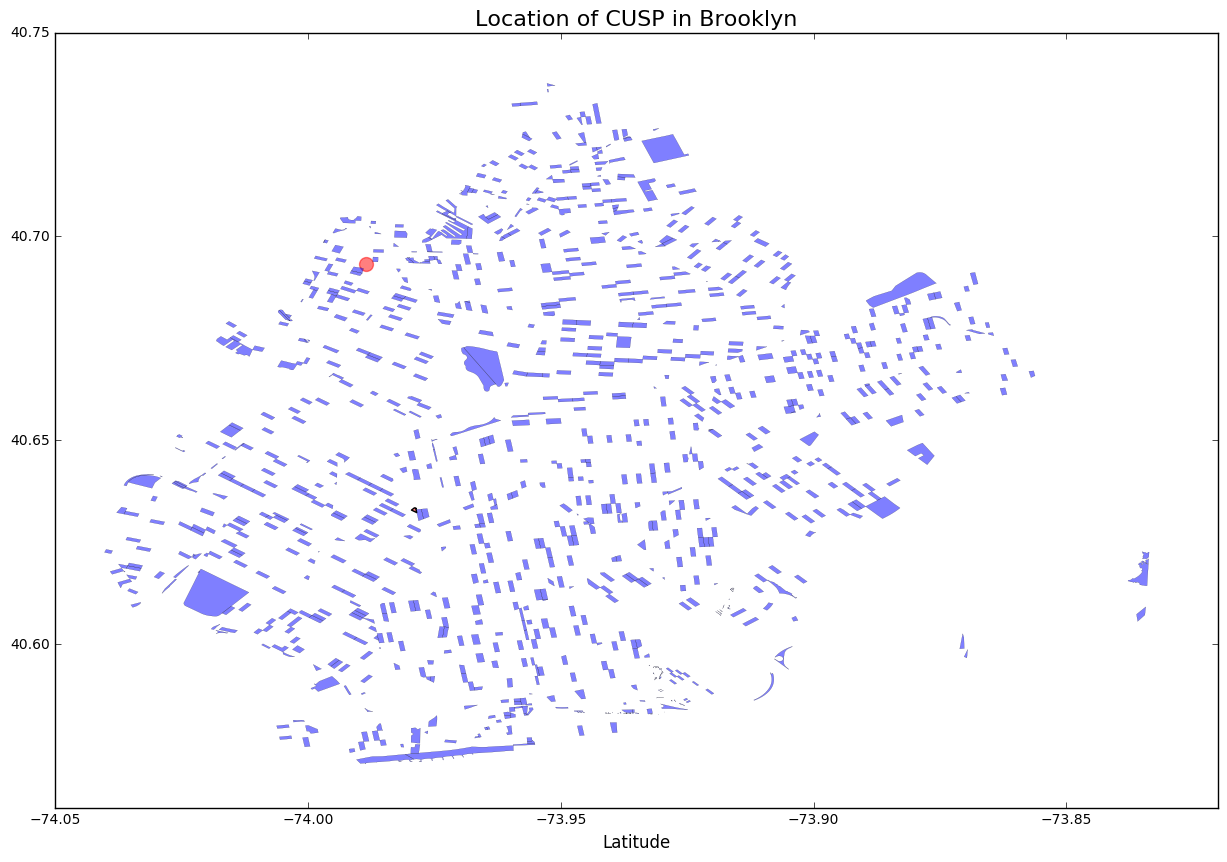

In [38]:
fig, ax = plt.subplots(1, figsize = (15,10))
ct_shape_brooklyn[::10].plot(ax=ax, color = 'blue', linewidth = 0.1)
cusp_ct_index.T.plot(ax=ax, color = 'red')
plt.scatter(cusp.x, cusp.y, color = 'red', s = 100, alpha = 0.5)
plt.xlim(-74.05, -73.82)
plt.ylim(40.56,40.75)
plt.xlabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.title('Location of CUSP in Brooklyn', fontsize = 16)
plt.show()

Figure 1: This is a map that shows every 10 Census tracts in Brooklyn. The red dot on the upper left side of the figure is the location for CUSP.